In [77]:
%matplotlib inline 

import cv2
import numpy as np
import copy
import matplotlib.pyplot as plt

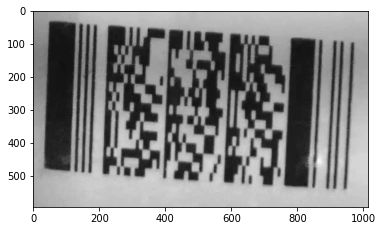

In [78]:
# INPUT_PATH = '/media/TrackDiagnostics/17-02-2021/19.00.00/19.52.49.032_9caa2942-712b-11eb-af87-4d7fc2377e80/InputStream/04.jpg'
INPUT_PATH = '/media/Work/Codes/Private/pdf417-decoder/code/python/new/src/out/Crop_Output.bmp'
input_image = cv2.imread(INPUT_PATH, 0)
plt.imshow(input_image, cmap='gray')

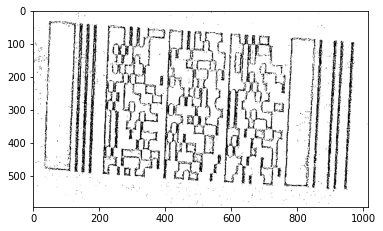

In [79]:
th3 = cv2.adaptiveThreshold(input_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,11,5)
plt.imshow(th3, cmap='gray')

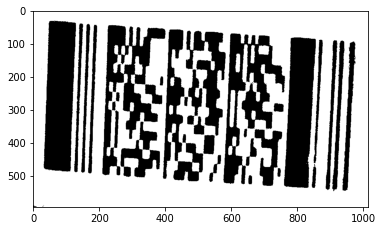

In [80]:
thresh1 = cv2.adaptiveThreshold(input_image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, 
                                          cv2.THRESH_BINARY, 199, 5)
plt.imshow(thresh1, cmap='gray')

In [81]:
def overlay_corners(image, corners, radius, color, inplace=False):
    if not inplace:
        overlaid_image = copy.deepcopy(image)
    else:
        overlaid_image = image

    corners = tuple(map(tuple, corners))
    for corner in corners:
        cv2.circle(overlaid_image, corner, radius, color, -1)
    return overlaid_image

In [82]:
def all_corners(var_gray_img, threshold=0.3):

    corners = cv2.goodFeaturesToTrack(var_gray_img, 1000, threshold, 10)
    var_all_corners = np.array(tuple(map(np.ravel, corners)), dtype=np.int0)
    
    return var_all_corners

var_all_corners = all_corners(thresh1)

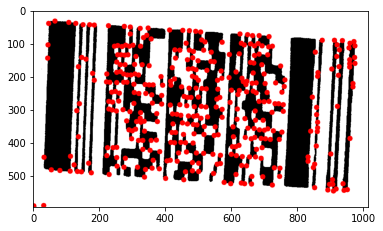

In [83]:
debug_img = cv2.merge((thresh1, thresh1, thresh1))

pt1_thickness, pt1_color = 8, (255, 0, 0)
debug_img2 = overlay_corners(debug_img, var_all_corners, pt1_thickness, pt1_color)
plt.imshow(debug_img2)

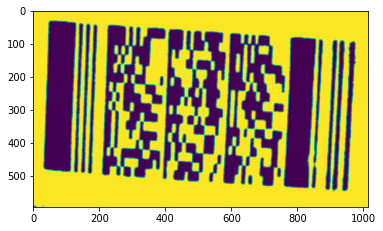

In [84]:
import numpy as np
from matplotlib import pyplot as plt


kernel = np.ones((5,5),np.float32)/25
dst = cv2.filter2D(thresh1,-1,kernel)
plt.imshow(dst)

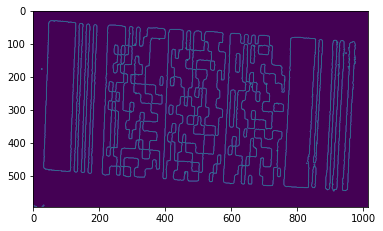

In [85]:
edges = cv2.Canny(thresh1, 100, 200)
plt.imshow(edges)

In [86]:
def all_corners(var_gray_img, threshold=0.3):

    corners = cv2.goodFeaturesToTrack(var_gray_img, 1000, threshold, 50)
    var_all_corners = np.array(tuple(map(np.ravel, corners)), dtype=np.int0)
    
    return var_all_corners

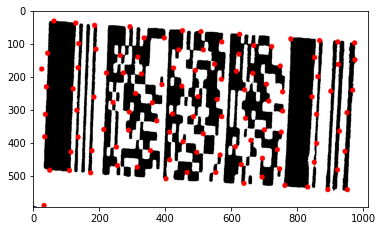

In [87]:
var_all_corners = all_corners(edges, threshold=0.05)
pt1_thickness, pt1_color = 8, (255, 0, 0)
debug_img3 = overlay_corners(debug_img, var_all_corners, pt1_thickness, pt1_color)
plt.imshow(debug_img3)